In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
devtools::install_github("FinYang/tsdl")
library(tsdl)
print(tsdl)

── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmpdh5YOR/remotes3ba730290c3/FinYang-tsdl-56e0915/DESCRIPTION’ ... OK
* preparing ‘tsdl’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘tsdl_0.1.0.tar.gz’

Time Series Data Library: 648 time series  

                       Frequency
Subject                 0.1 0.25   1   4   5   6  12  13  52 365 Total
  Agriculture             0    0  37   0   0   0   3   0   0   0    40
  Chemistry               0    0   8   0   0   0   0   0   0   0     8
  Computing               0    0   6   0   0   0   0   0   0   0     6
  Crime                   0    0   1   0   0   0   2   1   0   0     4
  Demography              1    0   9   2   0   0   3   0   0   2    17
  Ecology                 0    0  23   0   0   0   0   0   0   0    23
  Finance                 0  

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


$tsp
[1] 1962.000 1975.917   12.000

$class
[1] "ts"

$source
[1] "Cryer (1986)"

$description
[1] "Monthly milk production: pounds per cow. Jan 62 – Dec 75"

$subject
[1] "Agriculture"

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1962 589 561 640 656 727 697 640 599 568 577 553 582
1963 600 566 653 673 742 716 660 617 583 587 565 598
1964 628 618 688 705 770 736 678 639 604 611 594 634
1965 658 622 709 722 782 756 702 653 615 621 602 635
1966 677 635 736 755 811 798 735 697 661 667 645 688
1967 713 667 762 784 837 817 767 722 681 687 660 698
1968 717 696 775 796 858 826 783 740 701 706 677 711
1969 734 690 785 805 871 845 801 764 725 723 690 734
1970 750 707 807 824 886 859 819 783 740 747 711 751
1971 804 756 860 878 942 913 869 834 790 800 763 800
1972 826 799 890 900 961 935 894 855 809 810 766 805
1973 821 773 883 898 957 924 881 837 784 791 760 802
1974 828 778 889 902 969 947 908 867 815 812 773 813
1975 834 782 892 903 966 937 896 858 817 827 797 843


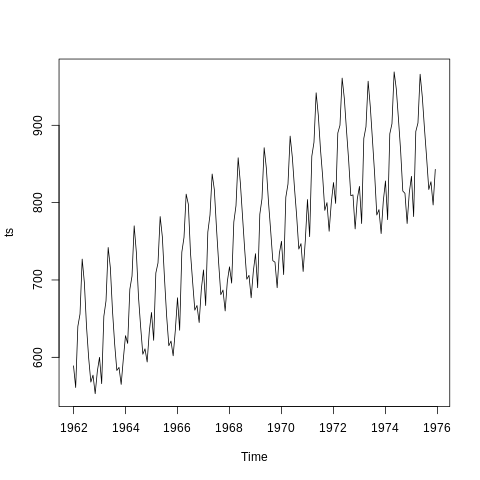

In [3]:
%%R
subject <- "Agriculture"
frequency <- 12
example <- 2
ts <- subset(tsdl, frequency, subject)
ts <- ts[[example]]

time_points <- time(ts)
years <- floor(time_points)
months <- round(12 * (time_points - years) + 1)

print(attributes(ts))
print(ts)
plot(ts)
write.csv(ts, "data.csv", row.names = FALSE)


,Value,Year,Period
0,589,1962,1
1,561,1962,2
2,640,1962,3
3,656,1962,4
4,727,1962,5


Period,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1962,589.0,561.0,640.0,656.0,727.0,697.0,640.0,599.0,568.0,577.0,553.0,582.0
1963,600.0,566.0,653.0,673.0,742.0,716.0,660.0,617.0,583.0,587.0,565.0,598.0
1964,628.0,618.0,688.0,705.0,770.0,736.0,678.0,639.0,604.0,611.0,594.0,634.0
1965,658.0,622.0,709.0,722.0,782.0,756.0,702.0,653.0,615.0,621.0,602.0,635.0
1966,677.0,635.0,736.0,755.0,811.0,798.0,735.0,697.0,661.0,667.0,645.0,688.0
1967,713.0,667.0,762.0,784.0,837.0,817.0,767.0,722.0,681.0,687.0,660.0,698.0
1968,717.0,696.0,775.0,796.0,858.0,826.0,783.0,740.0,701.0,706.0,677.0,711.0
1969,734.0,690.0,785.0,805.0,871.0,845.0,801.0,764.0,725.0,723.0,690.0,734.0
1970,750.0,707.0,807.0,824.0,886.0,859.0,819.0,783.0,740.0,747.0,711.0,751.0


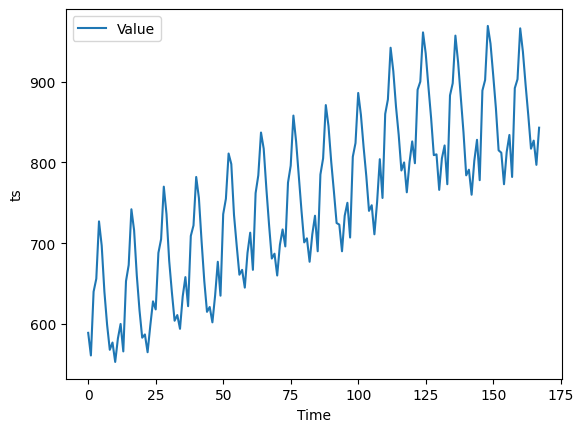

In [4]:
import pandas as pd
import rpy2.robjects as ro
from rpy2.robjects.packages import importr

# Install and import tsdl package
ro.r('suppressWarnings(suppressMessages(devtools::install_github("FinYang/tsdl")))')
tsdl = importr('tsdl')

# Set parameters
subject = "Agriculture"
frequency = 12  # monthly
example = 2

# Send all R code together
ro.r(f"""
ts_data <- subset(tsdl, {frequency}, "{subject}")[[{example}]]
time_points <- time(ts_data)
years <- floor(time_points)
periods <- round(12 * (time_points - years) + 1)
df <- data.frame(Value = as.numeric(ts_data), Year = years, Period = periods)
write.csv(df, "data.csv", row.names = FALSE)
""")

# Back to Python
df = pd.read_csv('data.csv')
display(df.head())


pivot_df = pd.pivot_table(df, values='Value', index='Year', columns='Period')
display(pivot_df)
df.plot(y='Value', ylabel='ts', xlabel='Time');
